In [22]:
import numpy as np
import pandas as pd
import string
from tqdm import tqdm
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [23]:
text = """
Matematik, Fen Bilimleri ve Yazılım Mühendisliği disiplinine özgü konularda yeterli bilgi birikimi; bu alanlardaki kuramsal ve uygulamalı bilgileri, karmaşık mühendislik problemlerinin çözümünde kullanabilme. Karmaşık mühendislik problemlerini tanımlama, formüle etme ve çözme; bu amaçla uygun analiz ve modelleme yöntemlerini seçme ve uygulama.
Karmaşık bir sistemi, süreci, cihazı veya ürünü gerçekçi kısıtlar ve koşullar altında, belirli gereksinimleri karşılayacak şekilde tasarlama; bu amaçla modern tasarım yöntemlerini uygulama. Mühendislik uygulamalarında karşılaşılan karmaşık problemlerin analizi ve çözümü için gerekli olan modern teknik ve araçları seçme ve kullanma; bilişim teknolojilerini etkin bir şekilde kullanma. Karmaşık Yazılım Mühendisliği problemlerinin veya disipline özgü araştırma konularının incelenmesi için deney tasarlama, deney yapma, veri toplama, sonuçları analiz etme ve yorumlama. Disiplin içi ve çok disiplinli takımlarda etkin biçimde çalışabilme; bireysel çalışma. Sözlü ve yazılı etkin iletişim kurma; en az bir yabancı dil bilgisi; etkin rapor yazma ve yazılı raporları anlama, tasarım ve üretim raporları hazırlayabilme, etkin sunum yapabilme, açık ve anlaşılır talimat verme ve alma. Yaşam boyu öğrenmenin gerekliliği konusunda farkındalık; bilgiye erişebilme, bilim ve teknolojideki gelişmeleri izleme ve kendini sürekli yenileme. Etik ilkelerine uygun davranma, mesleki ve etik sorumluluk ve mühendislik uygulamalarında kullanılan standartlar hakkında bilgi. Proje yönetimi, risk yönetimi ve değişiklik yönetimi gibi, iş hayatındaki uygulamalar hakkında bilgi; girişimcilik, yenilikçilik hakkında farkındalık; sürdürülebilir kalkınma hakkında bilgi. Mühendislik uygulamalarının evrensel ve toplumsal boyutlarda sağlık, çevre ve güvenlik üzerindeki etkileri ve çağın mühendislik alanına yansıyan sorunları hakkında bilgi; mühendislik çözümlerinin hukuksal sonuçları konusunda farkındalık. Kodlama, doğrulama, sınama ve hata ayıklama konularını da içerecek şekilde karmaşık yazılım sistemleri geliştirebilmek. Temel kalite metrikler tanımlayabilmek, yazılım yaşam döngüsü süreçlerini uygulayabilmek, yazılım kalitesini ölçebilmek, kalite model karakteristiklerini tanımlayabilmek, standartları uygulayabilmek ve bunları karmaşık yazılım sistemlerini analiz etmekte, tasarlamakta, geliştirmekte, doğrulamakta ve sınamakta kullanabilmek."""

In [24]:
lower_text = text.lower()

In [25]:
print(lower_text)


matematik, fen bilimleri ve yazılım mühendisliği disiplinine özgü konularda yeterli bilgi birikimi; bu alanlardaki kuramsal ve uygulamalı bilgileri, karmaşık mühendislik problemlerinin çözümünde kullanabilme. karmaşık mühendislik problemlerini tanımlama, formüle etme ve çözme; bu amaçla uygun analiz ve modelleme yöntemlerini seçme ve uygulama.
karmaşık bir sistemi, süreci, cihazı veya ürünü gerçekçi kısıtlar ve koşullar altında, belirli gereksinimleri karşılayacak şekilde tasarlama; bu amaçla modern tasarım yöntemlerini uygulama. mühendislik uygulamalarında karşılaşılan karmaşık problemlerin analizi ve çözümü için gerekli olan modern teknik ve araçları seçme ve kullanma; bilişim teknolojilerini etkin bir şekilde kullanma. karmaşık yazılım mühendisliği problemlerinin veya disipline özgü araştırma konularının incelenmesi için deney tasarlama, deney yapma, veri toplama, sonuçları analiz etme ve yorumlama. disiplin içi ve çok disiplinli takımlarda etkin biçimde çalışabilme; bireysel çalış

In [26]:
# Step 2: Make sentence segmentation (split the text into sentences)
sentences = lower_text.split('.')

In [27]:
print(sentences)

['\nmatematik, fen bilimleri ve yazılım mühendisliği disiplinine özgü konularda yeterli bilgi birikimi; bu alanlardaki kuramsal ve uygulamalı bilgileri, karmaşık mühendislik problemlerinin çözümünde kullanabilme', ' karmaşık mühendislik problemlerini tanımlama, formüle etme ve çözme; bu amaçla uygun analiz ve modelleme yöntemlerini seçme ve uygulama', '\nkarmaşık bir sistemi, süreci, cihazı veya ürünü gerçekçi kısıtlar ve koşullar altında, belirli gereksinimleri karşılayacak şekilde tasarlama; bu amaçla modern tasarım yöntemlerini uygulama', ' mühendislik uygulamalarında karşılaşılan karmaşık problemlerin analizi ve çözümü için gerekli olan modern teknik ve araçları seçme ve kullanma; bilişim teknolojilerini etkin bir şekilde kullanma', ' karmaşık yazılım mühendisliği problemlerinin veya disipline özgü araştırma konularının incelenmesi için deney tasarlama, deney yapma, veri toplama, sonuçları analiz etme ve yorumlama', ' disiplin içi ve çok disiplinli takımlarda etkin biçimde çalışabi

In [28]:
# Step 3: Remove punctuations
text = text.translate(str.maketrans('', '', string.punctuation))

In [29]:
print(text)


Matematik Fen Bilimleri ve Yazılım Mühendisliği disiplinine özgü konularda yeterli bilgi birikimi bu alanlardaki kuramsal ve uygulamalı bilgileri karmaşık mühendislik problemlerinin çözümünde kullanabilme Karmaşık mühendislik problemlerini tanımlama formüle etme ve çözme bu amaçla uygun analiz ve modelleme yöntemlerini seçme ve uygulama
Karmaşık bir sistemi süreci cihazı veya ürünü gerçekçi kısıtlar ve koşullar altında belirli gereksinimleri karşılayacak şekilde tasarlama bu amaçla modern tasarım yöntemlerini uygulama Mühendislik uygulamalarında karşılaşılan karmaşık problemlerin analizi ve çözümü için gerekli olan modern teknik ve araçları seçme ve kullanma bilişim teknolojilerini etkin bir şekilde kullanma Karmaşık Yazılım Mühendisliği problemlerinin veya disipline özgü araştırma konularının incelenmesi için deney tasarlama deney yapma veri toplama sonuçları analiz etme ve yorumlama Disiplin içi ve çok disiplinli takımlarda etkin biçimde çalışabilme bireysel çalışma Sözlü ve yazılı 

In [30]:
# Step 4: Remove stop words
with open('stopwords.txt') as f:
    stopwords = f.read().replace('\n',' ').split()
text = [word for word in text.split() if word not in stopwords]


In [31]:
print(text)

['Matematik', 'Fen', 'Bilimleri', 'Yazılım', 'Mühendisliği', 'disiplinine', 'özgü', 'konularda', 'yeterli', 'bilgi', 'birikimi', 'alanlardaki', 'kuramsal', 'uygulamalı', 'bilgileri', 'karmaşık', 'mühendislik', 'problemlerinin', 'çözümünde', 'kullanabilme', 'Karmaşık', 'mühendislik', 'problemlerini', 'tanımlama', 'formüle', 'etme', 'çözme', 'amaçla', 'uygun', 'analiz', 'modelleme', 'yöntemlerini', 'seçme', 'uygulama', 'Karmaşık', 'sistemi', 'süreci', 'cihazı', 'ürünü', 'gerçekçi', 'kısıtlar', 'koşullar', 'altında', 'belirli', 'gereksinimleri', 'karşılayacak', 'şekilde', 'tasarlama', 'amaçla', 'modern', 'tasarım', 'yöntemlerini', 'uygulama', 'Mühendislik', 'uygulamalarında', 'karşılaşılan', 'karmaşık', 'problemlerin', 'analizi', 'çözümü', 'gerekli', 'olan', 'modern', 'teknik', 'araçları', 'seçme', 'kullanma', 'bilişim', 'teknolojilerini', 'etkin', 'şekilde', 'kullanma', 'Karmaşık', 'Yazılım', 'Mühendisliği', 'problemlerinin', 'disipline', 'özgü', 'araştırma', 'konularının', 'incelenmesi'

In [32]:
# Step 5: Prepare training data for window size=2, number of negative samples=3
WINDOW_SIZE = 2
NUM_NEGATIVE_SAMPLES = 3

data = []

for sentence in sentences:
    words = sentence.split()
    for i, center_word in enumerate(words):
        context_words = [words[j] for j in range(max(0, i - WINDOW_SIZE), min(len(words), i + WINDOW_SIZE + 1)) if j != i]
        for context_word in context_words:
            data.append([center_word, context_word, 1])
            negative_samples = np.random.choice([w for w in words if w != center_word and w not in context_words], NUM_NEGATIVE_SAMPLES)
            for negative_samp in negative_samples:
                data.append([center_word, negative_samp, 0])

df = pd.DataFrame(columns=['center_word', 'context_word', 'label'], data=data)


In [33]:
print(df)

        center_word  context_word  label
0        matematik,           fen      1
1        matematik,   mühendislik      0
2        matematik,  mühendisliği      0
3        matematik,            bu      0
4        matematik,     bilimleri      1
...             ...           ...    ...
4147  kullanabilmek       bunları      0
4148  kullanabilmek     sınamakta      1
4149  kullanabilmek       yazılım      0
4150  kullanabilmek      etmekte,      0
4151  kullanabilmek     metrikler      0

[4152 rows x 3 columns]


In [34]:
# Step 6: Train the data with embedding size=5
EMBEDDING_SIZE = 5

# Initialize random embeddings
words = np.unique(df[['center_word', 'context_word']].values)
main_embeddings = np.random.normal(0, 0.1, (len(words), EMBEDDING_SIZE))
context_embeddings = np.random.normal(0, 0.1, (len(words), EMBEDDING_SIZE))

def sigmoid(v, scale=1):
    return 1 / (1 + np.exp(-scale * v))


def update_embeddings(df, main_embeddings, context_embeddings, learning_rate, debug=False):

    #get differences between main embeddings and corresponding context embeddings
    main_embeddings_center = main_embeddings.loc[df.center_word].values
    context_embeddings_context = context_embeddings.loc[df.context_word].values
    diffs = context_embeddings_context - main_embeddings_center

    #get similarities, scores, and errors between main embeddings and corresponding context embeddings
    dot_prods = np.sum(main_embeddings_center * context_embeddings_context, axis=1)
    scores = sigmoid(dot_prods)
    errors = (df.label - scores).values.reshape(-1,1)

    #calculate updates
    updates = diffs*errors*learning_rate
    updates_df = pd.DataFrame(data=updates)
    updates_df['center_word'] = df.center_word
    updates_df['context_word'] = df.context_word
    updates_df_center = updates_df.groupby('center_word').sum()
    updates_df_context = updates_df.groupby('context_word').sum()

    if debug:
        plot_words(debug)

    #apply updates
    main_embeddings += updates_df_center.loc[main_embeddings.index]
    context_embeddings -= updates_df_context.loc[context_embeddings.index]

    #normalize embeddings
    main_embeddings = normalize_data(main_embeddings)
    context_embeddings = normalize_data(context_embeddings)

    #return the updated embeddings
    return main_embeddings, context_embeddings


def normalize_data(data):
    row_norms = np.sqrt((data.values**2).sum(axis=1)).reshape(-1,1)
    return data.divide(row_norms, axis='index')

# Normalize embeddings
main_embeddings = normalize_data(pd.DataFrame(data=main_embeddings, index=words))
context_embeddings = normalize_data(pd.DataFrame(data=context_embeddings, index=words))

# Update embeddings
for _ in tqdm(range(25)):
    main_embeddings, context_embeddings = update_embeddings(df, main_embeddings, context_embeddings, 0.1)


  0%|          | 0/25 [00:00<?, ?it/s]<ipython-input-34-0aeb87a0ceb8>:30: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_center = updates_df.groupby('center_word').sum()
<ipython-input-34-0aeb87a0ceb8>:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_context = updates_df.groupby('context_word').sum()
<ipython-input-34-0aeb87a0ceb8>:30: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_center 

In [36]:
def get_similar_words(word, embeddings, top_n=5):
    similarity_scores = {}
    word_embedding = embeddings.loc[word]

    for w in embeddings.index:
        if w != word:
            similarity_scores[w] = 1 - cosine(word_embedding, embeddings.loc[w])

    sorted_similar_words = sorted(similarity_scores.items(), key=lambda x: x[1], reverse=True)
    return sorted_similar_words[:top_n]

# After updating the embeddings, get similar words for the top frequent words
for word in top_words:
    similar_words = get_similar_words(word, main_embeddings)
    print(f"{word}: {similar_words[:5]}")

def visualize_embeddings(embeddings, words):
    pca = PCA(n_components=2)
    transf_embeddings = pca.fit_transform(embeddings.values)
    plt.figure(figsize=(8, 8))
    plt.scatter(transf_embeddings[:, 0], transf_embeddings[:, 1], alpha=0.5)
    for i, word in enumerate(words):
        plt.annotate(word, xy=(transf_embeddings[i, 0], transf_embeddings[i, 1]), fontsize=12)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('Word Embeddings Visualization')
    plt.show()


ve: [('boyutlarda', 0.9235782237702451), ('bilim', 0.8986132315741499), ('uygulama', 0.8954774984675273), ('sağlık,', 0.8849988531144315), ('talimat', 0.8809724663602517)]
etkin: [('kalite', 0.963481142567976), ('amaçla', 0.9332915923970806), ('bilgisi;', 0.9306089843208987), ('kullanabilme', 0.9105707714625789), ('model', 0.899837458372051)]
mühendislik: [('yansıyan', 0.9836975879442231), ('alanına', 0.9774763474272891), ('konularını', 0.927006130345226), ('kalite', 0.90244658912433), ('model', 0.8960181380177963)]
hakkında: [('bilgi;', 0.9875704562900275), ('veri', 0.9476324095145247), ('model', 0.9471665217137261), ('konularını', 0.9383830560441814), ('bilgiye', 0.9253951488617114)]
karmaşık: [('girişimcilik,', 0.9715308976758515), ('sürdürülebilir', 0.9328884427139978), ('yenilikçilik', 0.9205566428230434), ('farkındalık;', 0.9184992064921362), ('yazılım', 0.8937622911932739)]


Top 5 most frequent words along with their top 5 nearest words:
ve: ['boyutlarda', 'bilim', 'uygulama', 'sağlık,', 'talimat']
etkin: ['kalite', 'amaçla', 'bilgisi;', 'kullanabilme', 'model']
mühendislik: ['yansıyan', 'alanına', 'konularını', 'kalite', 'model']
hakkında: ['bilgi;', 'veri', 'model', 'konularını', 'bilgiye']
karmaşık: ['girişimcilik,', 'sürdürülebilir', 'yenilikçilik', 'farkındalık;', 'yazılım']


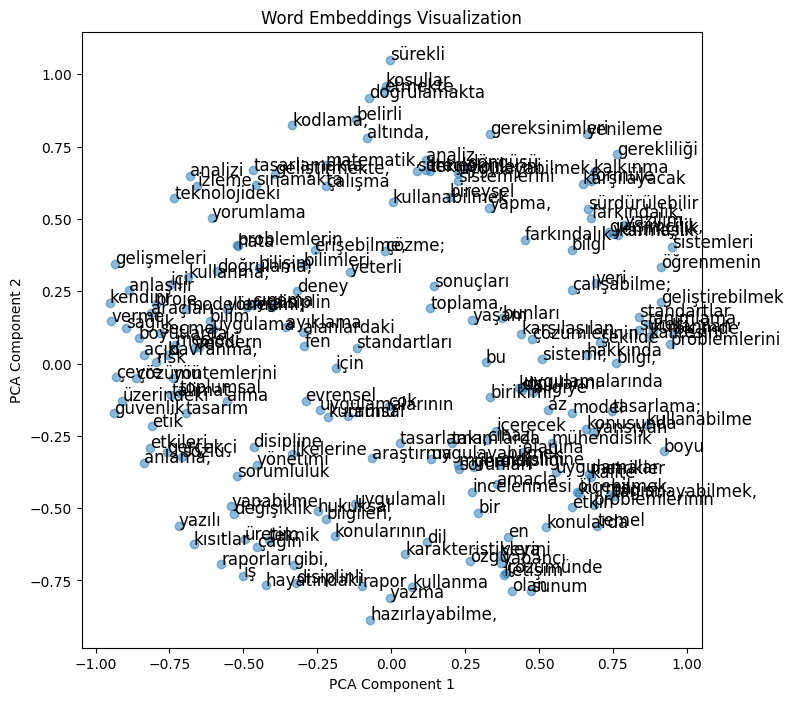

In [37]:
# Step 7: Show top 5 most frequent words along with their top 5 nearest words and visualize them
print("Top 5 most frequent words along with their top 5 nearest words:")
for word in top_words:
    similar_words = get_similar_words(word, main_embeddings)
    print(f"{word}: {[w[0] for w in similar_words[:5]]}")

# Visualize embeddings
visualize_embeddings(main_embeddings, words)


In [38]:
# Step 8: Prepare data for window size=4, number of negative samples=5
WINDOW_SIZE = 4
NUM_NEGATIVE_SAMPLES = 5

data = []

for sentence in sentences:
    words = sentence.split()
    for i, center_word in enumerate(words):
        context_words = [words[j] for j in range(max(0, i - WINDOW_SIZE), min(len(words), i + WINDOW_SIZE + 1)) if j != i]
        for context_word in context_words:
            data.append([center_word, context_word, 1])
            negative_samples = np.random.choice([w for w in words if w != center_word and w not in context_words], NUM_NEGATIVE_SAMPLES)
            for negative_samp in negative_samples:
                data.append([center_word, negative_samp, 0])

df = pd.DataFrame(columns=['center_word', 'context_word', 'label'], data=data)

In [39]:
print(df)

         center_word  context_word  label
0         matematik,           fen      1
1         matematik,     konularda      0
2         matematik,  mühendisliği      0
3         matematik,    bilgileri,      0
4         matematik,     çözümünde      0
...              ...           ...    ...
11827  kullanabilmek       döngüsü      0
11828  kullanabilmek    kalitesini      0
11829  kullanabilmek         model      0
11830  kullanabilmek    kalitesini      0
11831  kullanabilmek       yazılım      0

[11832 rows x 3 columns]


In [40]:
# Step 9: Train the data with embedding size=10
EMBEDDING_SIZE = 10

# Initialize random embeddings
words = np.unique(df[['center_word', 'context_word']].values)
main_embeddings = np.random.normal(0, 0.1, (len(words), EMBEDDING_SIZE))
context_embeddings = np.random.normal(0, 0.1, (len(words), EMBEDDING_SIZE))

# Normalize embeddings
main_embeddings = normalize_data(pd.DataFrame(data=main_embeddings, index=words))
context_embeddings = normalize_data(pd.DataFrame(data=context_embeddings, index=words))

# Update embeddings
for _ in tqdm(range(25)):
    main_embeddings, context_embeddings = update_embeddings(df, main_embeddings, context_embeddings, 0.1)


  0%|          | 0/25 [00:00<?, ?it/s]<ipython-input-34-0aeb87a0ceb8>:30: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_center = updates_df.groupby('center_word').sum()
<ipython-input-34-0aeb87a0ceb8>:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_context = updates_df.groupby('context_word').sum()
<ipython-input-34-0aeb87a0ceb8>:30: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_center 

Top 5 most frequent words along with their top 5 nearest similar words:
ve: ['uygulama', 'araçları', 'güvenlik', 'çevre', 'seçme']
etkin: ['sözlü', 'bilgisi;', 'iletişim', 'kurma;', 'yazılı']
mühendislik: ['kullanabilme', 'karmaşık', 'uygulamalarında', 'problemlerinin', 'sorunları']
hakkında: ['bilgi;', 'çözümlerinin', 'kalkınma', 'hukuksal', 'sorunları']
karmaşık: ['kullanabilme', 'çözümünde', 'problemlerinin', 'sistemi,', 'mühendislik']


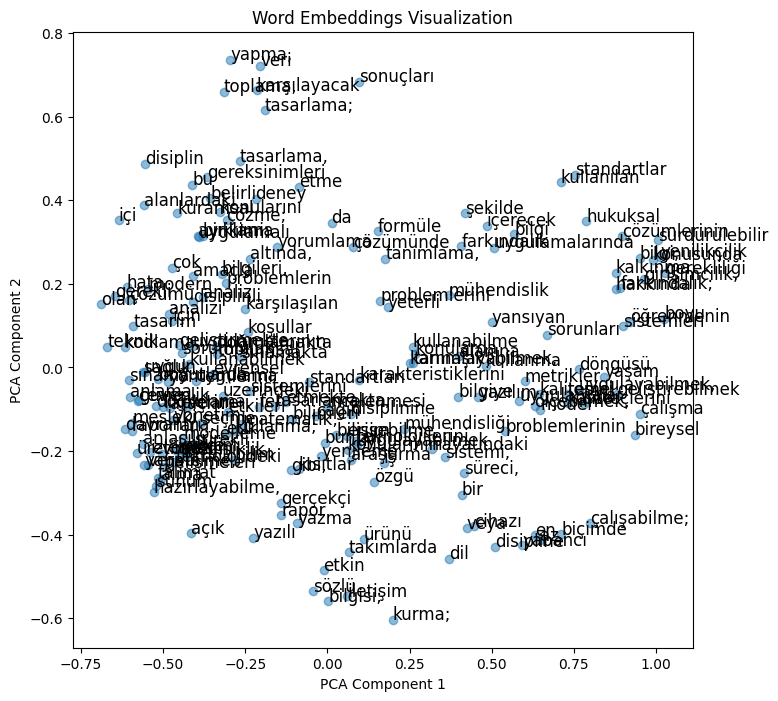

In [41]:
# Step 10: Show top 5 most frequent words with their top 5 nearest similar words and visualize them
print("Top 5 most frequent words along with their top 5 nearest similar words:")
for word in top_words:
    similar_words = get_similar_words(word, main_embeddings)
    print(f"{word}: {[w[0] for w in similar_words[:5]]}")

# Visualize embeddings
visualize_embeddings(main_embeddings, words)

In [ ]:
# Save embeddings to a text file
with open('embeddings_step_6.txt', 'w') as f:
    for word, embedding in zip(words, main_embeddings.values):
        embedding_str = ' '.join(map(str, embedding))
        f.write(f"{word} {embedding_str}\n")

# Save embeddings to a text file
with open('embeddings_step_9.txt', 'w') as f:
    for word, embedding in zip(words, main_embeddings.values):
        embedding_str = ' '.join(map(str, embedding))
        f.write(f"{word} {embedding_str}\n")
